<h1>Data Pre-processing</h1>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

<h3>Loading the original dataset</h3>

In [69]:
diabetes_binary_ds = pd.read_csv('diabetes_binary.csv')
diabetes_binary_ds.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h3>Checking for class imbalance</h3>
<h5>Target classes:</h5>
<p>0: Healthy</p>
<p>1: Diabetic/Prediabetic</p>

In [70]:
class_dist = diabetes_binary_ds["Diabetes_binary"].value_counts()
print("\n Count per Class: \n", class_dist)

class_percent = (class_dist/ diabetes_binary_ds.shape[0]) * 100
print("\n Percentage per Class: \n", class_percent)


 Count per Class: 
 0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

 Percentage per Class: 
 0.0    86.066698
1.0    13.933302
Name: Diabetes_binary, dtype: float64


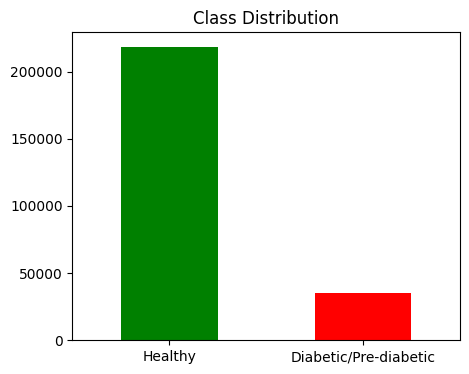

In [71]:

plt.figure(figsize=(5,4))
class_dist.plot(kind="bar", color=["green", "red"])
plt.xticks(ticks=range(len(class_dist)), labels=["Healthy", "Diabetic/Pre-diabetic"], rotation=0)
plt.title("Class Distribution")
plt.show()

<h3>Checking for missing values and labels</h3>

In [72]:
#1. check for missing target labels
missing_labels = diabetes_binary_ds["Diabetes_binary"].isnull().sum()
print('Number of missing labels: ', missing_labels)

#2. check for missing values
features = diabetes_binary_ds.drop(columns=['Diabetes_binary'])
missing_values = features.isnull().sum()
print('\nNumber of missing values: ', missing_labels)

Number of missing labels:  0

Number of missing values:  0


<h1>Data Cleaning</h1>

<p>Creating a new dataset for processing</p>

In [73]:
diabetes_binary_ds_copy = diabetes_binary_ds.copy()
diabetes_binary_ds_copy.to_csv('processed_diabetes_binary.csv', index=False)

diabetes_processed = pd.read_csv('processed_diabetes_binary.csv')

<h2>Reducing Dimensionality</h2>

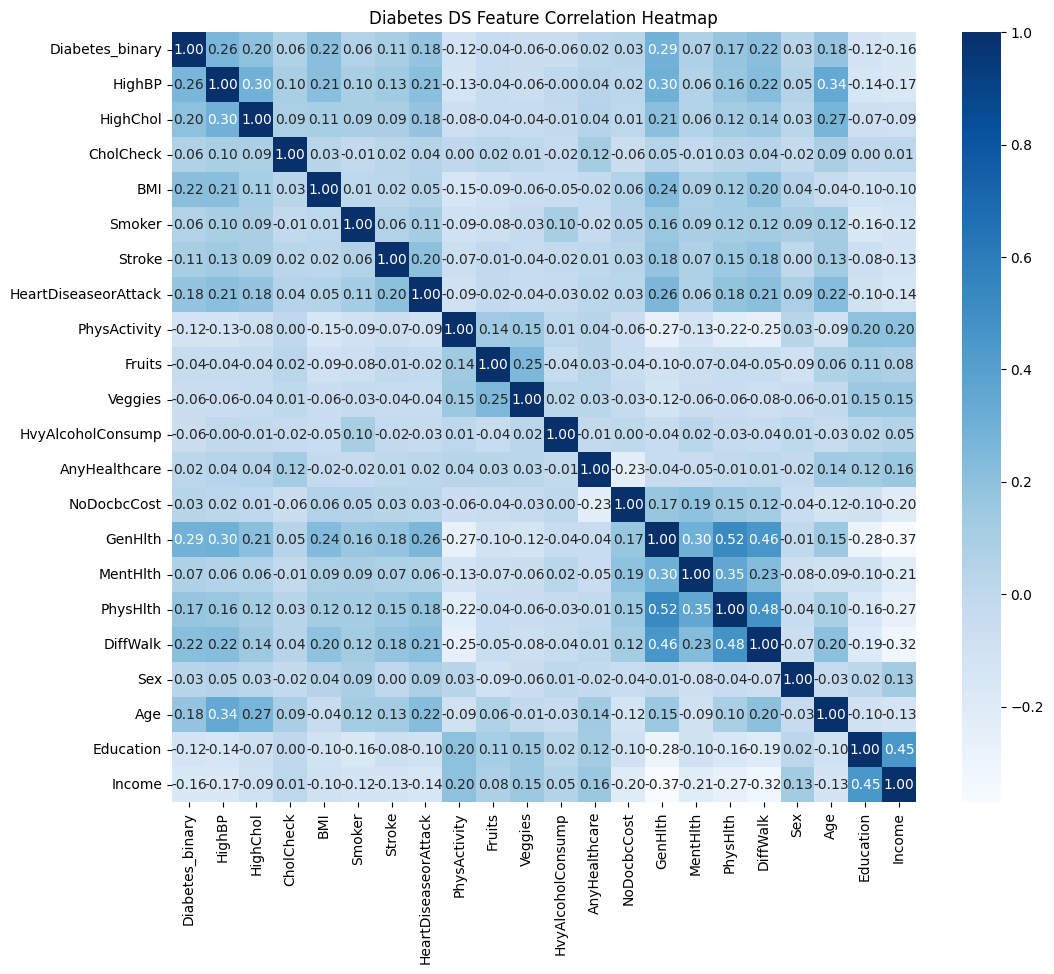

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
dtype: float64


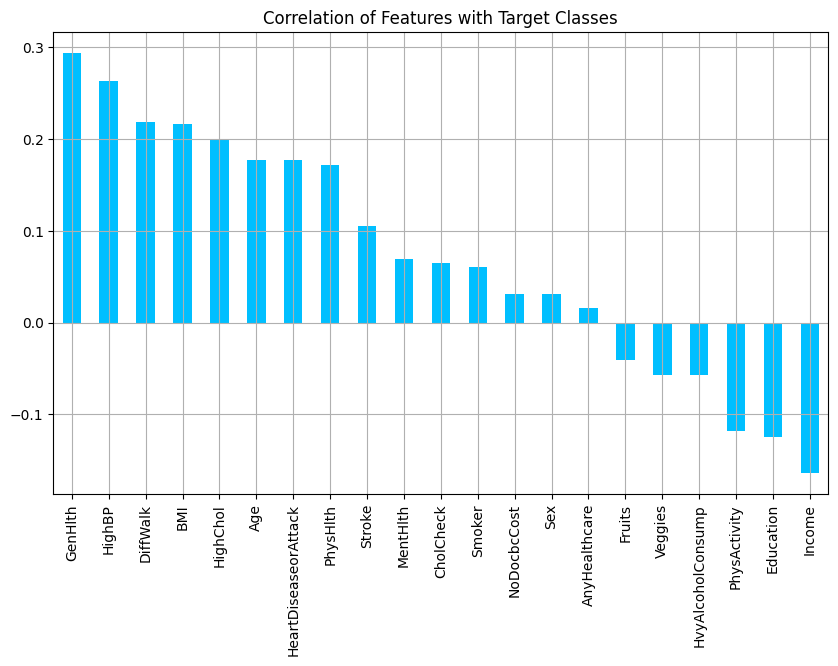

Low correlation features: ['Fruits', 'AnyHealthcare', 'NoDocbcCost', 'Sex']


In [24]:
corr_matrix = diabetes_processed.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title("Diabetes DS Feature Correlation Heatmap")
plt.show()
      
corr_target = diabetes_processed.corrwith(diabetes_processed['Diabetes_binary']).sort_values(ascending=False)
print(corr_target)

plt.figure(figsize=(10,6))
corr_target.drop('Diabetes_binary').plot(kind='bar', color='deepskyblue')
plt.title('Correlation of Features with Target Classes')
plt.grid(True)
plt.show()

# Identify low correlation features with the target
low_corr_features = corr_matrix['Diabetes_binary'][abs(corr_matrix['Diabetes_binary']) < 0.05].index.tolist()
print(f"Low correlation features: {low_corr_features}")

<h1>Removing features based on K best features</h1>
<p>see notebook KbestFeatureSelection</p>

In [74]:
#important: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'PhysActivity', 'Fruits','Veggies', 'AnyHealthcare', 'GenHlth', 'DiffWalk']

remove_features = ['Smoker', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']
diabetes_processed = diabetes_processed.drop(remove_features, axis=1)
diabetes_processed.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,DiffWalk
0,0.0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,1.0,5.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,3.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,1.0,0.0,1.0,5.0,1.0
3,0.0,1.0,0.0,1.0,27.0,1.0,1.0,1.0,1.0,2.0,0.0
4,0.0,1.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,2.0,0.0


<h3>Task 1: Removing Outliers</h3>

In [77]:
# Using IsolationForest for anomaly scores and 1.5 * IQR for classifying outliers. 
# IsolationForest isolates a "tree" or data point. Depending on how quickly it is isolated, it receives an anomaly score. Fewer splits = more anomalous.
# The higher the score, the more anomalous. 
 
pre = len(diabetes_processed)
isolation_forest = IsolationForest()
isolation_forest.fit(diabetes_processed)
anomaly_scores = isolation_forest.decision_function(diabetes_processed)

Q1 = np.percentile(anomaly_scores, 25)
Q3 = np.percentile(anomaly_scores, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = ((anomaly_scores < lower_bound) | (anomaly_scores > upper_bound))

diabetes_processed = diabetes_processed[~outlier_indices]
anomaly_scores_filtered = anomaly_scores[~outlier_indices]

num_removed = pre - len(diabetes_processed)
print(f"removed {num_removed} outliers")

removed 0 outliers


<h3>Task 2: Scaling Features </h3>

In [78]:

def scale_continuous_features(df):
    # Find continuous features
    continuous_features = df.columns[1:]
    
    if len(continuous_features) == 0:
        print("No continuous features found in the DataFrame.")
        return df
    
    # Scale the continuous features
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[continuous_features] = scaler.fit_transform(df[continuous_features])
    
    return df_scaled

diabetes_processed = scale_continuous_features(diabetes_processed)

diabetes_processed.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,DiffWalk
0,0.0,1.0,1.0,1.0,0.325581,0.0,0.0,1.0,1.0,1.00,1.0
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,0.0,0.50,0.0
2,0.0,1.0,1.0,1.0,0.186047,0.0,1.0,0.0,1.0,1.00,1.0
3,0.0,1.0,0.0,1.0,0.174419,1.0,1.0,1.0,1.0,0.25,0.0
4,0.0,1.0,1.0,1.0,0.139535,1.0,1.0,1.0,1.0,0.25,0.0


<h1>Splitting the Dataset</h1>

<h4>Step 1:</h4>
- Splitting dataset to 20% test and 80% training <br>
- our of 80% training, 25% validation<br>
- exporting the test set as csv at top level of repository<br>

In [79]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(diabetes_processed, test_size=0.20, stratify=diabetes_processed['Diabetes_binary'], random_state=92)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['Diabetes_binary'], random_state=92) # 0.25 x 0.80 = 0.20

test_df.to_csv('test.csv', index=False)


In [80]:
training = pd.read_csv('test.csv')
training.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,DiffWalk
0,0.0,0.0,0.0,1.0,0.093023,1.0,1.0,1.0,0.0,0.25,0.0
1,0.0,0.0,0.0,0.0,0.093023,1.0,1.0,1.0,1.0,0.25,0.0
2,0.0,1.0,0.0,1.0,0.255814,0.0,0.0,1.0,1.0,0.25,0.0
3,0.0,0.0,0.0,1.0,0.127907,1.0,1.0,1.0,1.0,0.00,0.0
4,0.0,1.0,0.0,1.0,0.279070,0.0,1.0,1.0,1.0,0.25,0.0


<h4>Step 2: </h4>

<p>Create a folder for each sampling method with its own notebook, training set and validation set </p>

In [54]:

import json
import os

def create_notebook_for_method(method_name):
    notebook_structure = {
        "cells": [
            {
                "cell_type": "markdown",
                "metadata": {},
                "source": [
                    f"# {method_name.capitalize()} Method\n",
                    "\n",
                    f"This notebook will apply the {method_name} balancing method to the training data."
                ]
            }
        ],
        "metadata": {
            "kernelspec": {
                "display_name": "Python 3",
                "language": "python",
                "name": "python3"
            },
            "language_info": {
                "codemirror_mode": {
                    "name": "ipython",
                    "version": 3
                },
                "file_extension": ".py",
                "mimetype": "text/x-python",
                "name": "python",
                "nbconvert_exporter": "python",
                "pygments_lexer": "ipython3",
                "version": "3.x"
            }
        },
        "nbformat": 4,
        "nbformat_minor": 2
    }

    notebook_path = f'{method_name}/{method_name}_method.ipynb'
    with open(notebook_path, 'w') as notebook_file:
        json.dump(notebook_structure, notebook_file)

# Function to set up folder, export datasets, and create a notebook for each method
def setup_method_environment(method_name, train_df, val_df):
    method_dir = method_name
    if not os.path.exists(method_dir):
        os.makedirs(method_dir)
    
    train_df.to_csv(f'{method_dir}/train.csv', index=False)
    val_df.to_csv(f'{method_dir}/val.csv', index=False)
    
    create_notebook_for_method(method_name)

balancing_methods = ['no_balancing', 'SMOTE', 'undersampling', 'oversampling', 'SMOTE+ENN']
for method in balancing_methods:
    setup_method_environment(method, train_df, val_df)
